In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Loading and inspecting the data
-

In [2]:
data = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')
data.head()

In [4]:
data.shape

(541909, 8)

In [5]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data['Country'].nunique()

38

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Data-type conversion
-

In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data[['InvoiceNo', 'StockCode', 'CustomerID']] = data[['InvoiceNo', 'StockCode','CustomerID']].astype('category')
data.info()

In [11]:
data_clean = data.copy()

Data Cleaning
-

In [12]:
data = data.dropna()
data.isna().sum()

In [14]:
data.shape

(406829, 8)

In [15]:
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,406829.000000,406829,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-31 11:48:00,1.950000
75%,12.000000,2011-10-20 13:06:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,248.693370,NaN,69.315162


In [16]:
data.duplicated().sum()

5225

In [17]:
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
data['Description'] = data['Description'].str.strip()
data['Country'] = data['Country'].str.strip()
data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]
data.info()

In [19]:
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,397884.000000,397884,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488
min,1.000000,2010-12-01 08:26:00,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 14:39:00,1.950000
75%,12.000000,2011-10-20 14:33:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,179.331775,NaN,22.097877


In [20]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


PLOTS
-

In [21]:
df_eda=data.copy()

Sales trends & seasonality
-

In [22]:
import pandas as pd


df_eda['InvoiceDate'] = pd.to_datetime(df_eda['InvoiceDate'])


df_eda['Year'] = df_eda['InvoiceDate'].dt.year
df_eda['Month'] = df_eda['InvoiceDate'].dt.month
df_eda['YearMonth'] = df_eda['InvoiceDate'].dt.to_period('M')
df_eda['DayOfWeek'] = df_eda['InvoiceDate'].dt.day_name()
df_eda['Hour'] = df_eda['InvoiceDate'].dt.hour


df_eda['TotalPrice'] = df_eda['Quantity'] * df_eda['UnitPrice']

import matplotlib.pyplot as plt

monthly_sales = df_eda.groupby('YearMonth')['TotalPrice'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Revenue')
plt.xlabel('Year-Month')
plt.grid(True)
plt.show()



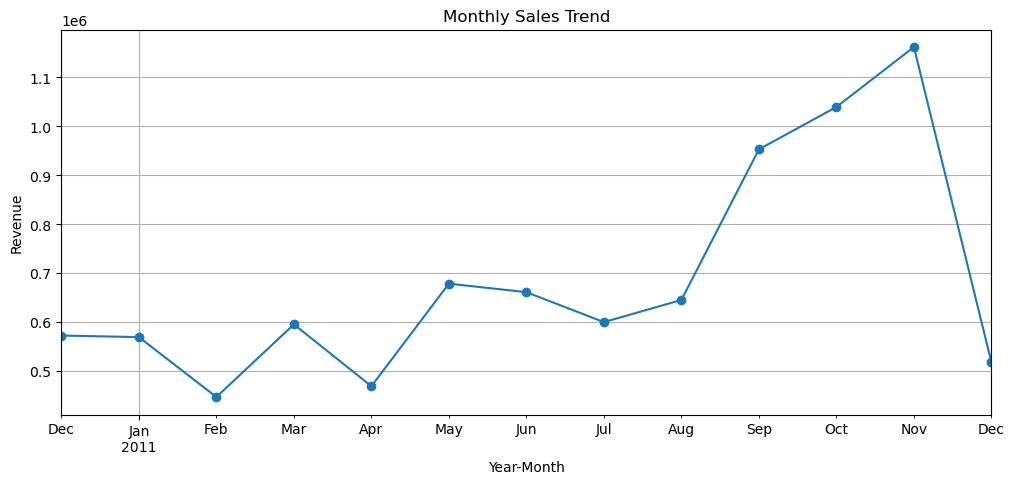

Weekdays vs Sunday
-

In [24]:
weekday_sales = df_eda.groupby('DayOfWeek')['TotalPrice'].sum()
weekday_sales = weekday_sales[weekday_sales > 0]

import seaborn as sns

weekday_sales = df_eda.groupby('DayOfWeek')['TotalPrice'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10,5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='viridis')
plt.title('Revenue by Day of the Week')
plt.ylabel('Revenue')
plt.show()


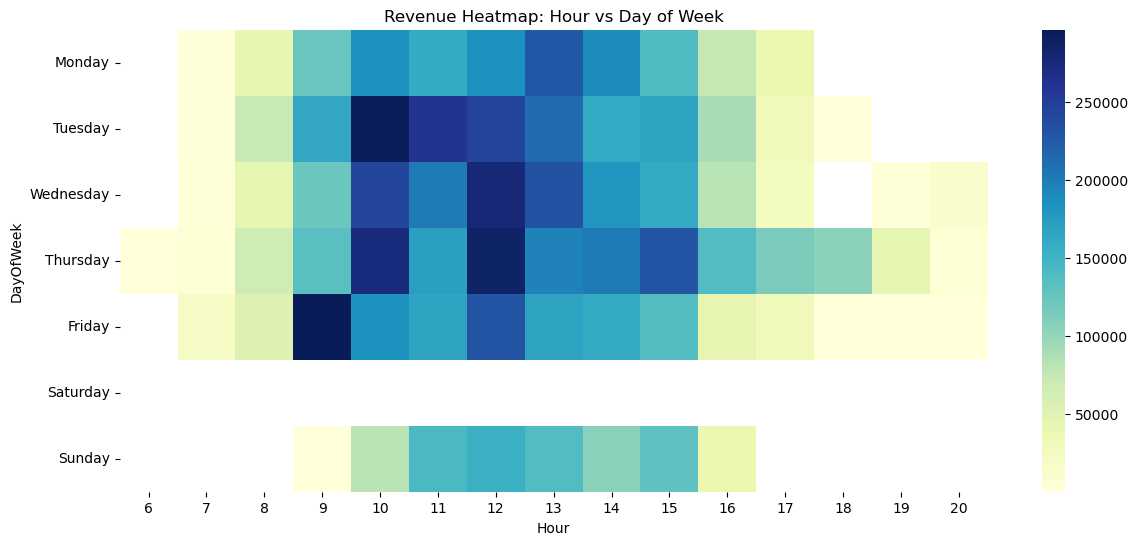

In [26]:
# Pivot table: hours vs day of week
heatmap_data = df_eda.pivot_table(
    index='DayOfWeek',
    columns='Hour',
    values='TotalPrice',
    aggfunc='sum'
).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Revenue Heatmap: Hour vs Day of Week')
plt.show()


Country-wise Analysis
-

Top non-UK countries by revenue
-

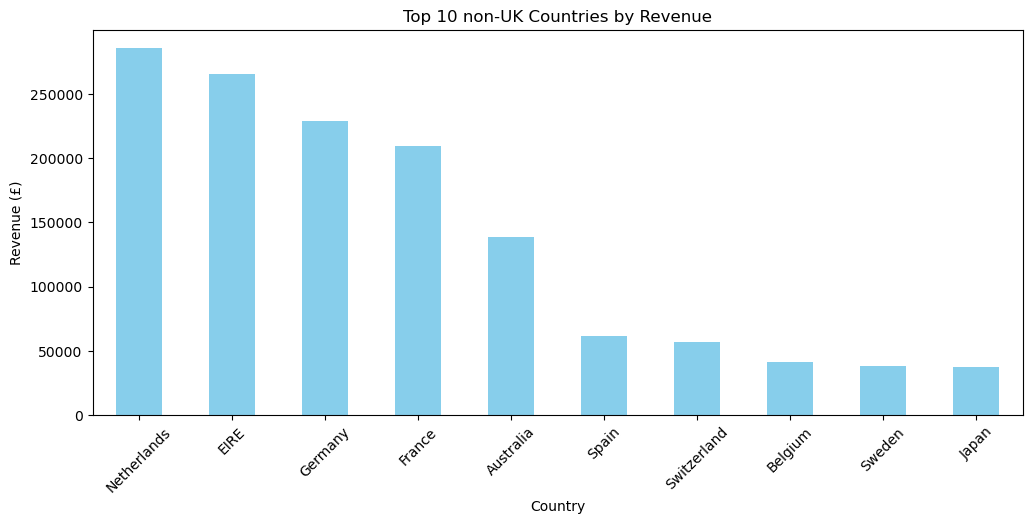

In [27]:
country_sales = df_eda.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
country_sales[1:11].plot(kind='bar', color='skyblue')  # [1:11] to skip UK if it's dominating
plt.title('Top 10 non-UK Countries by Revenue')
plt.ylabel('Revenue (£)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


Average Order Value (AOV) per Country
-

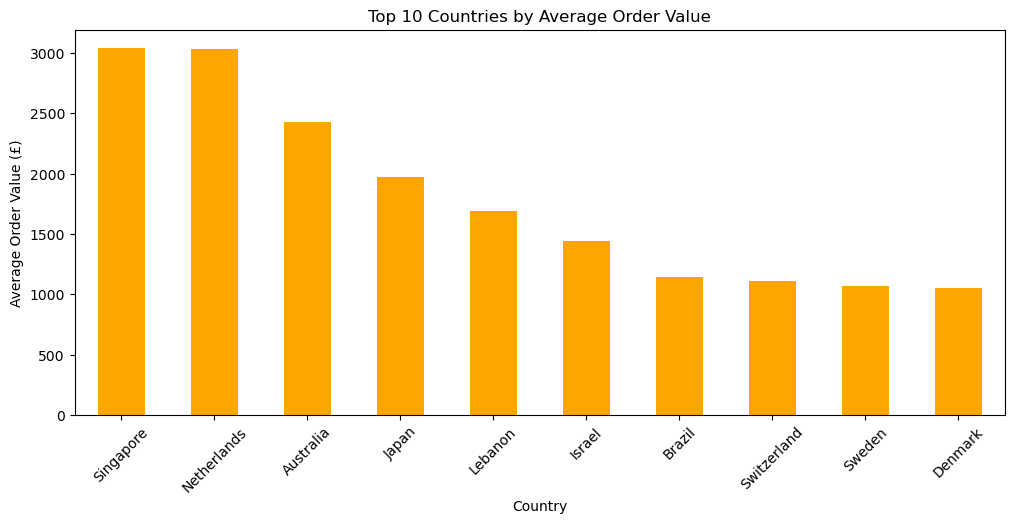

In [28]:
aov_country = (
    df_eda.groupby('Country')
    .apply(lambda x: x['TotalPrice'].sum() / x['InvoiceNo'].nunique())
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,5))
aov_country.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Average Order Value')
plt.ylabel('Average Order Value (£)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


UK vs Non-UK Customers
-

In [29]:
df_eda['Region'] = df_eda['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Non-UK')

region_summary = df_eda.groupby('Region').agg({
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceNo': 'NumOrders', 'CustomerID': 'NumCustomers', 'TotalPrice': 'Revenue'})

region_summary['AvgOrderValue'] = region_summary['Revenue'] / region_summary['NumOrders']
print(region_summary)


        NumOrders  NumCustomers      Revenue  AvgOrderValue
Region                                                     
Non-UK       1886           418  1603016.350     849.955647
UK          16646          3920  7308391.554     439.047913


Product Lifecycle Analysis
-

In [30]:
#1. Identifying First Sale Date for Each Product
product_first_sale = (
    df_eda.groupby('StockCode')['InvoiceDate']
    .min()
    .reset_index()
    .rename(columns={'InvoiceDate': 'FirstSaleDate'})
)
df_eda = df_eda.merge(product_first_sale, on='StockCode', how='left')


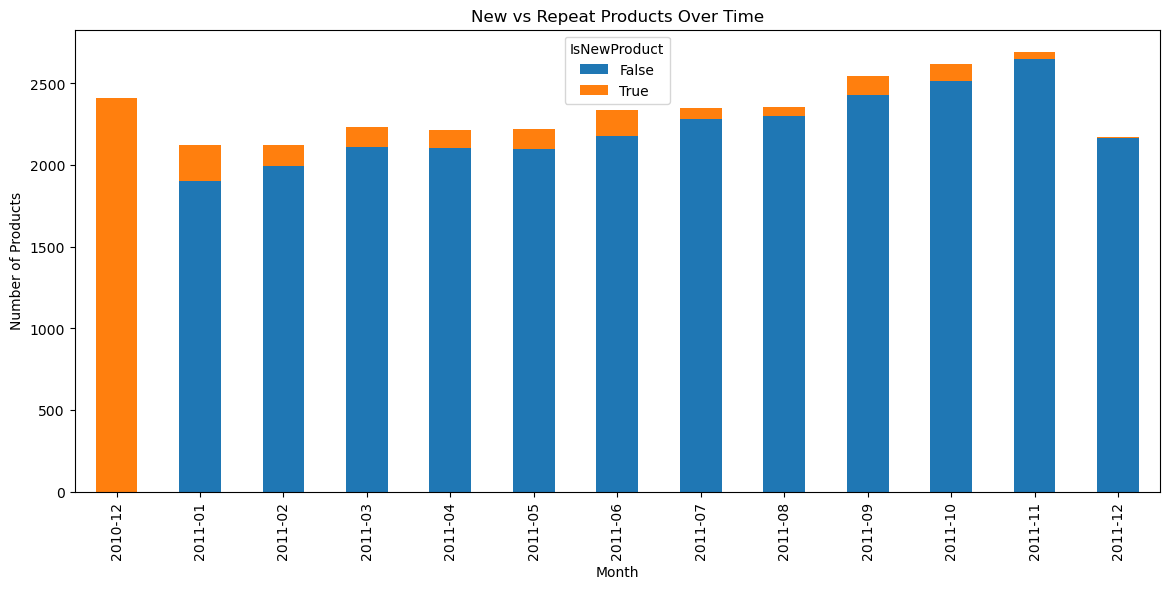

In [31]:
#2. New vs Repeat Products Over Time
import pandas as pd
import matplotlib.pyplot as plt

# Mark if a sale is the product's first month
df_eda['SaleMonth'] = df_eda['InvoiceDate'].dt.to_period('M')
df_eda['FirstSaleMonth'] = df_eda['FirstSaleDate'].dt.to_period('M')
df_eda['IsNewProduct'] = df_eda['SaleMonth'] == df_eda['FirstSaleMonth']

monthly_new_repeat = (
    df_eda.groupby(['SaleMonth', 'IsNewProduct'])['StockCode']
    .nunique()
    .unstack(fill_value=0)
)

monthly_new_repeat.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('New vs Repeat Products Over Time')
plt.ylabel('Number of Products')
plt.xlabel('Month')
plt.show()



RFM Analysis
-

In [32]:

data['TotalAmount'] = data['Quantity'] * data['UnitPrice']


customer_agg = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',         # Number of unique purchases (Frequency)
    'InvoiceDate': 'max',           # Most recent purchase date (for Recency)
    'Quantity': 'sum',              # Total quantity purchased
    'TotalAmount': 'sum',           # Total monetary value (Monetary)
}).reset_index()


customer_agg = customer_agg.rename(columns={
    'InvoiceNo': 'Frequency',
    'InvoiceDate': 'LastPurchaseDate',
    'Quantity': 'TotalQuantity',
    'TotalAmount': 'TotalSpent'
})

customer_agg.head()

In [34]:
customer_agg.shape

(4372, 5)

In [35]:
customer_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        4372 non-null   category      
 1   Frequency         4372 non-null   int64         
 2   LastPurchaseDate  4338 non-null   datetime64[ns]
 3   TotalQuantity     4372 non-null   int64         
 4   TotalSpent        4372 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 308.5 KB


In [36]:
customer_agg.isna().sum()

CustomerID           0
Frequency            0
LastPurchaseDate    34
TotalQuantity        0
TotalSpent           0
dtype: int64

In [37]:
customer_agg=customer_agg.dropna()
customer_agg.isna().sum()

In [39]:
customer_agg.shape

(4338, 5)

In [40]:
customer_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 0 to 4371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        4338 non-null   category      
 1   Frequency         4338 non-null   int64         
 2   LastPurchaseDate  4338 non-null   datetime64[ns]
 3   TotalQuantity     4338 non-null   int64         
 4   TotalSpent        4338 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 341.1 KB


In [41]:
reference_date = customer_agg['LastPurchaseDate'].max() + pd.Timedelta(days=1)
customer_agg['Recency'] = (reference_date - customer_agg['LastPurchaseDate']).dt.days
customer_agg.head()

,CustomerID,Frequency,LastPurchaseDate,TotalQuantity,TotalSpent,Recency
0,12346.0,1,2011-01-18 10:01:00,74215,77183.60,326
1,12347.0,7,2011-12-07 15:52:00,2458,4310.00,2
2,12348.0,4,2011-09-25 13:13:00,2341,1797.24,75
3,12349.0,1,2011-11-21 09:51:00,631,1757.55,19
4,12350.0,1,2011-02-02 16:01:00,197,334.40,310


In [42]:
customer_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 0 to 4371
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        4338 non-null   category      
 1   Frequency         4338 non-null   int64         
 2   LastPurchaseDate  4338 non-null   datetime64[ns]
 3   TotalQuantity     4338 non-null   int64         
 4   TotalSpent        4338 non-null   float64       
 5   Recency           4338 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 375.0 KB


In [43]:
from sklearn.preprocessing import StandardScaler

df_gpt= customer_agg.copy()
rfm_df = df_gpt[['Recency', 'Frequency', 'TotalSpent']]


scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'TotalSpent'])

rfm_scaled_df.head()


,Recency,Frequency,TotalSpent
0,2.334574,-0.425097,8.358668
1,-0.905340,0.354417,0.250966
2,-0.175360,-0.035340,-0.028596
3,-0.735345,-0.425097,-0.033012
4,2.174578,-0.425097,-0.191347


In [44]:
rfm_scaled_df.tail()

,Recency,Frequency,TotalSpent
4333,1.854587,-0.425097,-0.208459
4334,0.884612,-0.425097,-0.219560
4335,-0.845342,-0.295178,-0.208742
4336,-0.885341,1.523687,0.004519
4337,-0.495351,-0.165259,-0.024141


In [45]:
customer_agg.shape


(4338, 6)

In [46]:
rfm_scaled_df.shape

(4338, 3)

In [47]:
rfm_scaled_df.columns = ['Recency_1', 'Frequency_1', 'TotalSpent_1']
rfm_scaled_df.head()

,Recency_1,Frequency_1,TotalSpent_1
0,2.334574,-0.425097,8.358668
1,-0.905340,0.354417,0.250966
2,-0.175360,-0.035340,-0.028596
3,-0.735345,-0.425097,-0.033012
4,2.174578,-0.425097,-0.191347


In [48]:
rfm_scaled_df.shape

(4338, 3)

In [49]:
rfm_scaled_df.isna().sum()
customer_agg.shape

Recency_1       0
Frequency_1     0
TotalSpent_1    0
dtype: int64

In [51]:
#customer_agg = pd.concat([customer_agg, rfm_scaled_df], axis=1)

In [52]:
customer_agg = customer_agg.reset_index(drop=True)
rfm_scaled_df = rfm_scaled_df.reset_index(drop=True)

customer_agg = pd.concat([customer_agg, rfm_scaled_df], axis=1)


In [53]:
customer_agg.shape

(4338, 9)

In [54]:
customer_agg.rename(columns={'Recency_1': 'Recency_sc', 'Frequency_1': 'Frequency_sc', 'TotalSpent_1': 'TotalSpent_sc'}, inplace=True)
customer_agg.head()

,CustomerID,Frequency,LastPurchaseDate,TotalQuantity,TotalSpent,Recency,Recency_sc,Frequency_sc,TotalSpent_sc
0,12346.0,1,2011-01-18 10:01:00,74215,77183.60,326,2.334574,-0.425097,8.358668
1,12347.0,7,2011-12-07 15:52:00,2458,4310.00,2,-0.905340,0.354417,0.250966
2,12348.0,4,2011-09-25 13:13:00,2341,1797.24,75,-0.175360,-0.035340,-0.028596
3,12349.0,1,2011-11-21 09:51:00,631,1757.55,19,-0.735345,-0.425097,-0.033012
4,12350.0,1,2011-02-02 16:01:00,197,334.40,310,2.174578,-0.425097,-0.191347


In [55]:
customer_agg[customer_agg['CustomerID'] == 12350]

,CustomerID,Frequency,LastPurchaseDate,TotalQuantity,TotalSpent,Recency,Recency_sc,Frequency_sc,TotalSpent_sc
4,12350.0,1,2011-02-02 16:01:00,197,334.4,310,2.174578,-0.425097,-0.191347


In [56]:
customer_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        4338 non-null   category      
 1   Frequency         4338 non-null   int64         
 2   LastPurchaseDate  4338 non-null   datetime64[ns]
 3   TotalQuantity     4338 non-null   int64         
 4   TotalSpent        4338 non-null   float64       
 5   Recency           4338 non-null   int64         
 6   Recency_sc        4338 non-null   float64       
 7   Frequency_sc      4338 non-null   float64       
 8   TotalSpent_sc     4338 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(3)
memory usage: 442.9 KB


In [57]:
customer_agg.isna().sum()

CustomerID          0
Frequency           0
LastPurchaseDate    0
TotalQuantity       0
TotalSpent          0
Recency             0
Recency_sc          0
Frequency_sc        0
TotalSpent_sc       0
dtype: int64

In [58]:
customer_agg.head()

,CustomerID,Frequency,LastPurchaseDate,TotalQuantity,TotalSpent,Recency,Recency_sc,Frequency_sc,TotalSpent_sc
0,12346.0,1,2011-01-18 10:01:00,74215,77183.60,326,2.334574,-0.425097,8.358668
1,12347.0,7,2011-12-07 15:52:00,2458,4310.00,2,-0.905340,0.354417,0.250966
2,12348.0,4,2011-09-25 13:13:00,2341,1797.24,75,-0.175360,-0.035340,-0.028596
3,12349.0,1,2011-11-21 09:51:00,631,1757.55,19,-0.735345,-0.425097,-0.033012
4,12350.0,1,2011-02-02 16:01:00,197,334.40,310,2.174578,-0.425097,-0.191347


Optimal k (Elbow + Silhouette)
-

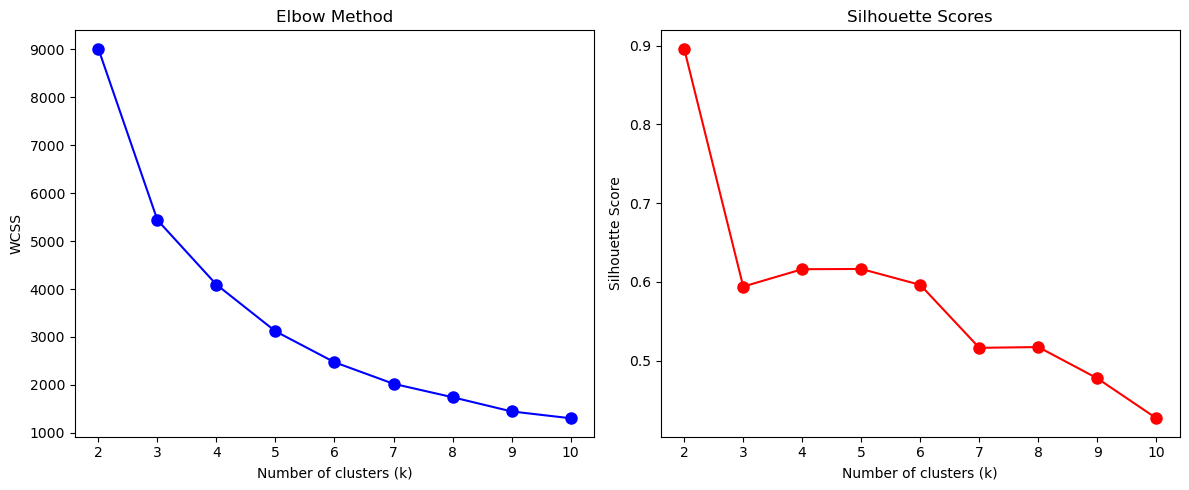

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select scaled columns for clustering
X = customer_agg[['Recency_sc', 'Frequency_sc', 'TotalSpent_sc']]

wcss = []
silhouette_scores = []

K = range(2, 11)  # Try cluster sizes from 2 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow curve
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(K, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Plot Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'ro-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

plt.tight_layout()
plt.show()


In [60]:
# Fit K-Means with chosen k (example: k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_agg['Cluster'] = kmeans.fit_predict(X)

# No. of customers in each cluster
print(customer_agg['Cluster'].value_counts())


Cluster
0    3054
1    1067
3     204
2      13
Name: count, dtype: int64


In [61]:
# Cluster profiling using original RFM columns
cluster_profiles = customer_agg.groupby('Cluster')[['Recency', 'Frequency', 'TotalSpent']].mean()
print(cluster_profiles)


            Recency  Frequency     TotalSpent
Cluster                                      
0         43.702685   3.682711    1359.049284
1        248.075914   1.552015     480.617480
2          7.384615  82.538462  127338.313846
3         15.500000  22.333333   12709.090490


## RFM Clustering Results (k = 4)

- **Cluster 0 – Potential Loyalists**
  - Avg. Recency: ~44 days  
  - Avg. Frequency: ~3.7 purchases  
  - Avg. TotalSpent: ~₹1,359  
  - Moderate recency, moderate frequency, and spend — could be nurtured into loyal customers.

- **Cluster 1 – Lost Customers**
  - Avg. Recency: ~248 days  
  - Avg. Frequency: ~1.55 purchases  
  - Avg. TotalSpent: ~₹481  
  - Long time since last purchase, low engagement — likely inactive, require reactivation strategies.

- **Cluster 2 – Champions (VIP)**
  - Avg. Recency: ~7 days  
  - Avg. Frequency: ~82.5 purchases  
  - Avg. TotalSpent: ~₹127,338  
  - Extremely recent, very high purchase frequency and spend — top priority customers.

- **Cluster 3 – Loyal Big Spenders**
  - Avg. Recency: ~15.5 days  
  - Avg. Frequency: ~22.3 purchases  
  - Avg. TotalSpent: ~₹12,709  
  - Recently active, high engagement, and strong spend — highly valuable and loyal.


In [62]:
data[data['CustomerID']==12350]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
80323,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,12350.0,Norway,25.2
80324,543037,22412,METAL SIGN NEIGHBOURHOOD WITCH,12,2011-02-02 16:01:00,2.10,12350.0,Norway,25.2
80325,543037,79066K,RETRO MOD TRAY,10,2011-02-02 16:01:00,0.85,12350.0,Norway,8.5
80326,543037,79191C,RETRO PLASTIC ELEPHANT TRAY,12,2011-02-02 16:01:00,0.85,12350.0,Norway,10.2
80327,543037,22348,TEA BAG PLATE RED RETROSPOT,24,2011-02-02 16:01:00,0.85,12350.0,Norway,20.4
80328,543037,84086C,PINK/PURPLE RETRO RADIO,6,2011-02-02 16:01:00,2.95,12350.0,Norway,17.7
80329,543037,22551,PLASTERS IN TIN SPACEBOY,12,2011-02-02 16:01:00,1.65,12350.0,Norway,19.8
80330,543037,22557,PLASTERS IN TIN VINTAGE PAISLEY,12,2011-02-02 16:01:00,1.65,12350.0,Norway,19.8
80331,543037,21832,CHOCOLATE CALCULATOR,12,2011-02-02 16:01:00,1.65,12350.0,Norway,19.8
80332,543037,21915,RED HARMONICA IN BOX,12,2011-02-02 16:01:00,1.25,12350.0,Norway,15.0


In [63]:

df = data.copy()
df = df.dropna(subset=['CustomerID', 'InvoiceDate', 'Quantity', 'UnitPrice'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']


monthly_main = df.groupby(['CustomerID', 'YearMonth']).agg(
    Frequency=('InvoiceNo', 'nunique'),
    Quantity=('Quantity', 'sum'),
    TotalSpent=('TotalSpent', 'sum'),
    ProductDiversity=('StockCode', 'nunique')
).reset_index()


monthly_main['AvgBasketSize'] = monthly_main['Quantity'] / monthly_main['Frequency']


monthly_main = monthly_main.sort_values(['CustomerID', 'YearMonth'], ascending=[True, False])


def extract_features(group):
    group = group.head(4)
    data = {}
    for i, row in enumerate(group.itertuples(index=False), 1):
        data[f'F{i}'] = row.Frequency
        data[f'Q{i}'] = row.Quantity
        data[f'TS{i}'] = row.TotalSpent
        data[f'BS{i}'] = row.AvgBasketSize
        data[f'DV{i}'] = row.ProductDiversity
    for i in range(len(group) + 1, 5):
        data[f'F{i}'] = 0
        data[f'Q{i}'] = 0
        data[f'TS{i}'] = 0
        data[f'BS{i}'] = 0
        data[f'DV{i}'] = 0
    return pd.Series(data)

final_df = monthly_main.groupby('CustomerID').apply(extract_features).reset_index()


final_df.head()


,CustomerID,F1,Q1,TS1,BS1,DV1,F2,Q2,TS2,BS2,...,F3,Q3,TS3,BS3,DV3,F4,Q4,TS4,BS4,DV4
0,12346.0,0.0,0.0,0.00,NaN,0.0,0.0,0.0,0.00,NaN,...,0.0,0.0,0.00,NaN,0.0,0.0,0.0,0.0,NaN,0.0
1,12347.0,1.0,192.0,224.82,192.0,11.0,0.0,0.0,0.00,NaN,...,1.0,676.0,1294.32,676.0,47.0,0.0,0.0,0.0,NaN,0.0
2,12348.0,0.0,0.0,0.00,NaN,0.0,0.0,0.0,0.00,NaN,...,0.0,0.0,0.00,NaN,0.0,1.0,217.0,310.0,217.0,3.0
3,12349.0,0.0,0.0,0.00,NaN,0.0,1.0,631.0,1757.55,631.0,...,0.0,0.0,0.00,NaN,0.0,0.0,0.0,0.0,NaN,0.0
4,12350.0,0.0,0.0,0.00,NaN,0.0,0.0,0.0,0.00,NaN,...,0.0,0.0,0.00,NaN,0.0,0.0,0.0,0.0,NaN,0.0


In [64]:
final_df.shape

(4372, 21)

In [65]:
final_df.isna().sum()

CustomerID       0
F1               0
Q1               0
TS1              0
BS1           3757
DV1              0
F2               0
Q2               0
TS2              0
BS2           2708
DV2              0
F3               0
Q3               0
TS3              0
BS3           3008
DV3              0
F4               0
Q4               0
TS4              0
BS4           3106
DV4              0
dtype: int64

In [66]:
final_df[final_df.select_dtypes(include='number').columns] = (
    final_df.select_dtypes(include='number').fillna(0)
)
final_df

,CustomerID,F1,Q1,TS1,BS1,DV1,F2,Q2,TS2,BS2,...,F3,Q3,TS3,BS3,DV3,F4,Q4,TS4,BS4,DV4
0,12346.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12347.0,1.0,192.0,224.82,192.0,11.0,0.0,0.0,0.00,0.0,...,1.0,676.0,1294.32,676.0,47.0,0.0,0.0,0.0,0.0,0.0
2,12348.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,1.0,217.0,310.0,217.0,3.0
3,12349.0,0.0,0.0,0.00,0.0,0.0,1.0,631.0,1757.55,631.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12350.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4368,18281.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4369,18282.0,1.0,28.0,77.84,28.0,5.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4370,18283.0,1.0,142.0,208.00,142.0,50.0,4.0,450.0,651.56,112.5,...,1.0,63.0,114.65,63.0,38.0,1.0,95.0,134.9,95.0,47.0


In [67]:

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


max_date = data['InvoiceDate'].max()


last_purchase = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_purchase['DaysSinceLastPurchase'] = (max_date - last_purchase['InvoiceDate']).dt.days


last_purchase['Churn'] = (last_purchase['DaysSinceLastPurchase'] > 180).astype(int)


last_purchase = last_purchase[['CustomerID', 'Churn']]


last_purchase.head()


,CustomerID,Churn
0,12346.0,1
1,12347.0,0
2,12348.0,0
3,12349.0,0
4,12350.0,1


In [68]:
final_df_model = final_df.merge(last_purchase[['CustomerID', 'Churn']], on='CustomerID', how='left')
#final_df['Churn'] = final_df['Churn'].fillna(0).astype(int)
final_df_model.head()

,CustomerID,F1,Q1,TS1,BS1,DV1,F2,Q2,TS2,BS2,...,Q3,TS3,BS3,DV3,F4,Q4,TS4,BS4,DV4,Churn
0,12346.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,12347.0,1.0,192.0,224.82,192.0,11.0,0.0,0.0,0.00,0.0,...,676.0,1294.32,676.0,47.0,0.0,0.0,0.0,0.0,0.0,0
2,12348.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,1.0,217.0,310.0,217.0,3.0,0
3,12349.0,0.0,0.0,0.00,0.0,0.0,1.0,631.0,1757.55,631.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,12350.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [69]:
final_df_model.shape

(4372, 22)

In [70]:
final_df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  4372 non-null   category
 1   F1          4372 non-null   float64 
 2   Q1          4372 non-null   float64 
 3   TS1         4372 non-null   float64 
 4   BS1         4372 non-null   float64 
 5   DV1         4372 non-null   float64 
 6   F2          4372 non-null   float64 
 7   Q2          4372 non-null   float64 
 8   TS2         4372 non-null   float64 
 9   BS2         4372 non-null   float64 
 10  DV2         4372 non-null   float64 
 11  F3          4372 non-null   float64 
 12  Q3          4372 non-null   float64 
 13  TS3         4372 non-null   float64 
 14  BS3         4372 non-null   float64 
 15  DV3         4372 non-null   float64 
 16  F4          4372 non-null   float64 
 17  Q4          4372 non-null   float64 
 18  TS4         4372 non-null   float64 
 19  BS4   

In [71]:
final_df_model['Churn'].value_counts()

Churn
0    3514
1     858
Name: count, dtype: int64

In [79]:
final_eda= final_df_model.copy()

In [80]:
final_eda.shape

(4372, 22)

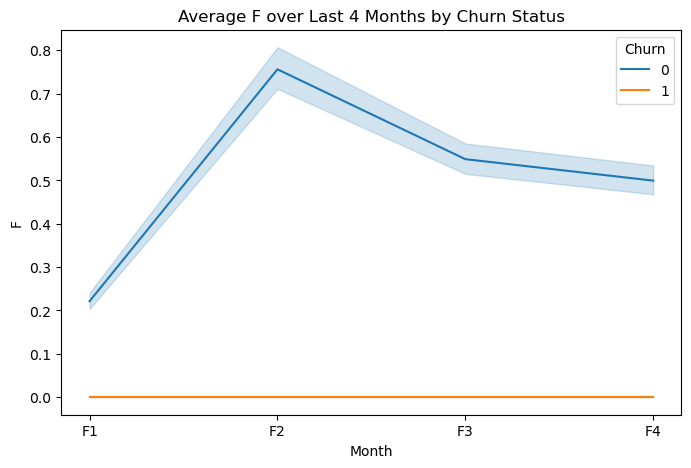

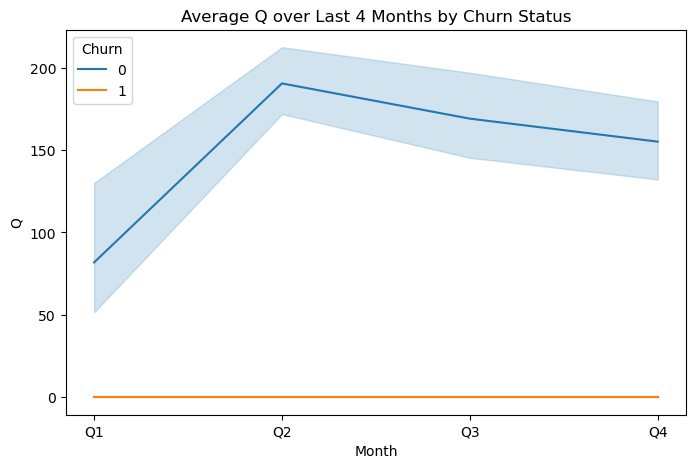

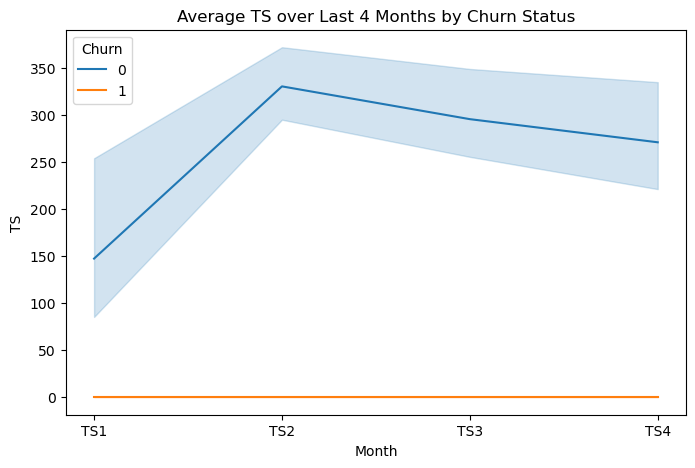

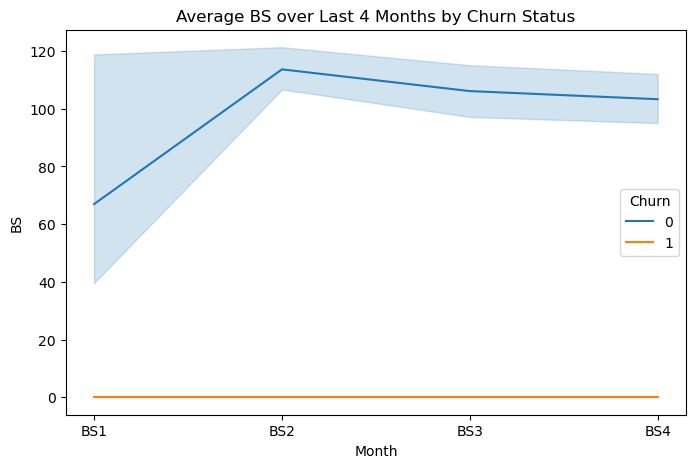

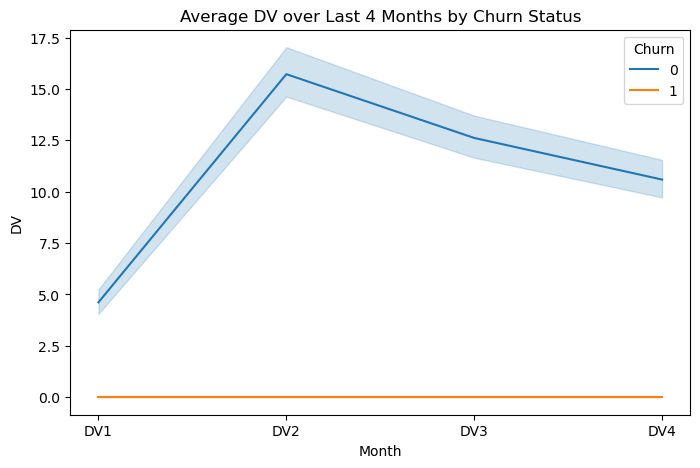

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['F', 'Q', 'TS', 'BS', 'DV']
for metric in metrics:
    cols = [f"{metric}{i}" for i in range(1, 5)]
    df_melt = final_eda.melt(id_vars=['Churn'], value_vars=cols,
                      var_name='Month', value_name=metric)

    plt.figure(figsize=(8, 5))
    sns.lineplot(x='Month', y=metric, hue='Churn', data=df_melt, estimator='mean')
    plt.title(f"Average {metric} over Last 4 Months by Churn Status")
    plt.show()


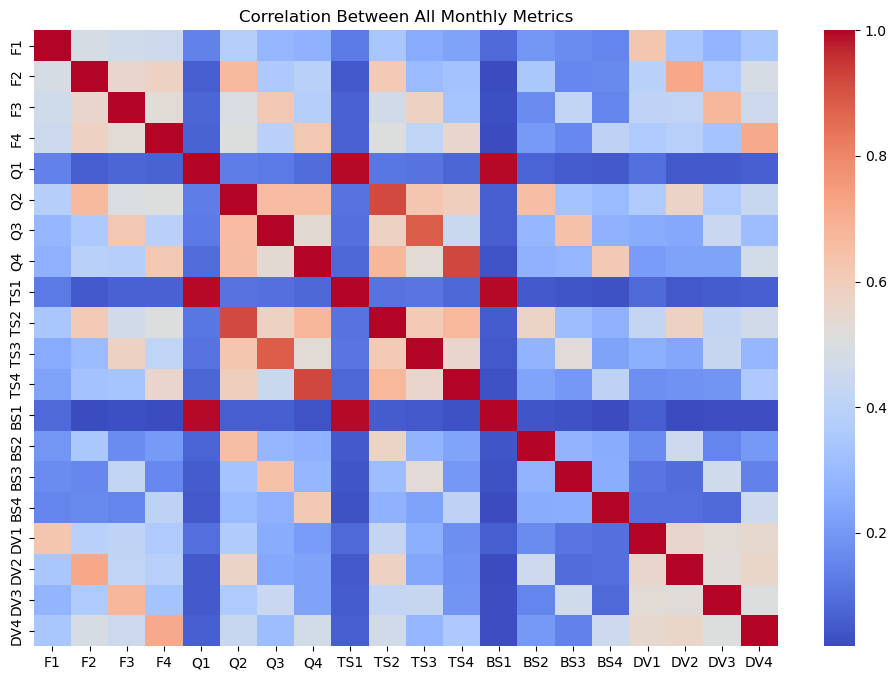

In [83]:
corr_cols = []
for m in metrics:
    corr_cols.extend([f"{m}{i}" for i in range(1, 5)])

plt.figure(figsize=(12, 8))
sns.heatmap(final_eda[corr_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Between All Monthly Metrics")
plt.show()


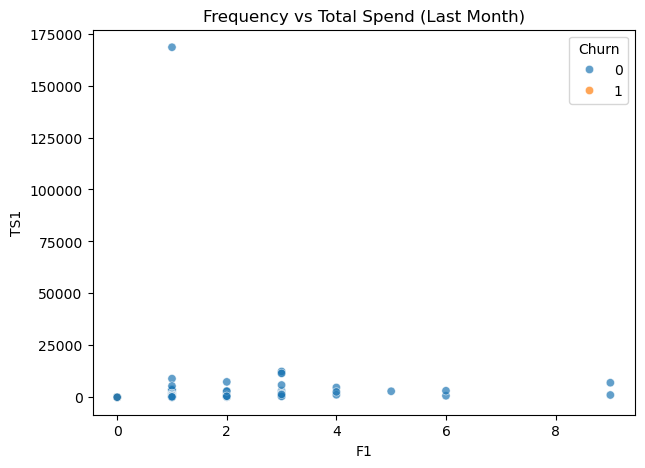

In [84]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='F1', y='TS1', hue='Churn', data=final_eda, alpha=0.7)
plt.title("Frequency vs Total Spend (Last Month)")
plt.show()


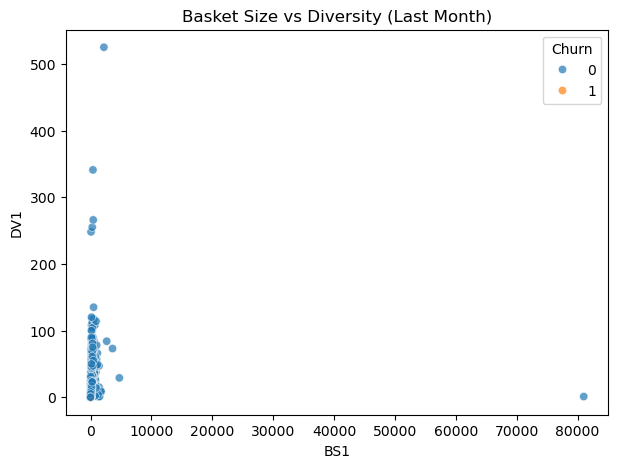

In [85]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='BS1', y='DV1', hue='Churn', data=final_eda, alpha=0.7)
plt.title("Basket Size vs Diversity (Last Month)")
plt.show()


XGB OPTUNA
-

In [72]:
import optuna
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np

df_model = final_df_model.drop(columns=['CustomerID'])


X = df_model.drop('Churn', axis=1)
y = df_model['Churn']


def objective(trial):
    # Hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 1000, 2200),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.07, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []


    # Lists to collect training and testing metrics
    train_acc_list, train_prec_list, train_rec_list, train_f1_list, train_roc_auc_list = [], [], [], [], []
    test_acc_list, test_prec_list, test_rec_list, test_f1_list, test_roc_auc_list = [], [], [], [], []


    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = XGBClassifier(**params)
        model.fit(X_train, y_train)

        # Predict on test set
        y_test_pred = model.predict(X_test)
        y_test_proba = model.predict_proba(X_test)[:, 1]

        # Predict on training set
        y_train_pred = model.predict(X_train)
        y_train_proba = model.predict_proba(X_train)[:, 1]

        # Test set metrics
        test_acc_list.append(accuracy_score(y_test, y_test_pred))
        test_prec_list.append(precision_score(y_test, y_test_pred))
        test_rec_list.append(recall_score(y_test, y_test_pred))
        test_f1_list.append(f1_score(y_test, y_test_pred))
        test_roc_auc_list.append(roc_auc_score(y_test, y_test_proba))

        # Training set metrics
        train_acc_list.append(accuracy_score(y_train, y_train_pred))
        train_prec_list.append(precision_score(y_train, y_train_pred))
        train_rec_list.append(recall_score(y_train, y_train_pred))
        train_f1_list.append(f1_score(y_train, y_train_pred))
        train_roc_auc_list.append(roc_auc_score(y_train, y_train_proba))

        print(classification_report(y_test, y_test_pred))
        
    # Print Average Training Metrics
    print("\n=== Average Training Metrics Across 5 Folds ===")
    print(f"Accuracy:  {np.mean(train_acc_list):.4f}")
    print(f"Precision: {np.mean(train_prec_list):.4f}")
    print(f"Recall:    {np.mean(train_rec_list):.4f}")
    print(f"F1 Score:  {np.mean(train_f1_list):.4f}")
    print(f"ROC AUC:   {np.mean(train_roc_auc_list):.4f}")

    # Print Average Testing Metrics
    print("\n=== Average Testing Metrics Across 5 Folds ===")
    print(f"Accuracy:  {np.mean(test_acc_list):.4f}")
    print(f"Precision: {np.mean(test_prec_list):.4f}")
    print(f"Recall:    {np.mean(test_rec_list):.4f}")
    print(f"F1 Score:  {np.mean(test_f1_list):.4f}")
    print(f"ROC AUC:   {np.mean(test_roc_auc_list):.4f}")

    # Return validation (test) F1 score for Optuna to optimize
    return np.mean(test_f1_list)

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Best parameters
print("\nBest hyperparameters:")
print(study.best_params)


[I 2025-08-14 17:19:32,871] A new study created in memory with name: no-name-9315734f-27a3-4f67-b818-7e8fbdcbbd11


              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0       1.00      0.83      0.90       703
           1       0.58      1.00      0.74       172

    accuracy                           0.86       875
   macro avg       0.79      0.91      0.82       875
weighted avg       0.92      0.86      0.87       875

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       702
           1       0.60      1.00      0.75       172

    accuracy                           0.87       874
   macro avg       0.80      0.92      0.83       874
weighted avg       0.92      0.87      0.88       874

              preci

[I 2025-08-14 17:19:39,061] Trial 0 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 1222, 'max_depth': 9, 'learning_rate': 0.1029502523999972, 'subsample': 0.6683117427016815, 'colsample_bytree': 0.6966513181380556, 'gamma': 3.472383736269849, 'reg_alpha': 0.549941482498354, 'reg_lambda': 1.218646318207397}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:19:47,926] Trial 1 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 1913, 'max_depth': 6, 'learning_rate': 0.2933321441166479, 'subsample': 0.9943545434112623, 'colsample_bytree': 0.5913217944888023, 'gamma': 0.6244936201779477, 'reg_alpha': 3.0247797733174115, 'reg_lambda': 4.206485767811036}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:19:54,164] Trial 2 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 1256, 'max_depth': 8, 'learning_rate': 0.13828927114529072, 'subsample': 0.6515081206346308, 'colsample_bytree': 0.6649100706635058, 'gamma': 2.731802165766907, 'reg_alpha': 1.3537660016322184, 'reg_lambda': 2.972699633557277}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:20:01,463] Trial 3 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 1470, 'max_depth': 7, 'learning_rate': 0.2560583183381619, 'subsample': 0.6283054033236425, 'colsample_bytree': 0.8951693533382028, 'gamma': 4.930625337228381, 'reg_alpha': 0.8148414762511674, 'reg_lambda': 1.3576207216596647}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:20:07,631] Trial 4 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 1248, 'max_depth': 4, 'learning_rate': 0.15755149680514963, 'subsample': 0.8862645572614306, 'colsample_bytree': 0.8303871806417484, 'gamma': 0.5231475341206498, 'reg_alpha': 4.272225237295695, 'reg_lambda': 2.0613767090943487}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:20:13,917] Trial 5 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 1306, 'max_depth': 2, 'learning_rate': 0.17740217867669336, 'subsample': 0.5247441490875705, 'colsample_bytree': 0.8333408205743048, 'gamma': 3.9190840745898, 'reg_alpha': 3.5437581165746357, 'reg_lambda': 3.4442490362188147}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:20:22,689] Trial 6 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 1803, 'max_depth': 9, 'learning_rate': 0.14175074293392256, 'subsample': 0.9995513671804533, 'colsample_bytree': 0.8671097928160394, 'gamma': 3.243529400330765, 'reg_alpha': 0.14757657324234008, 'reg_lambda': 4.25264061950756}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:20:30,690] Trial 7 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 1649, 'max_depth': 2, 'learning_rate': 0.11437902105289008, 'subsample': 0.856254103096467, 'colsample_bytree': 0.9355215181695051, 'gamma': 4.357921414072567, 'reg_alpha': 1.1311361832270546, 'reg_lambda': 1.8360406464019379}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:20:38,546] Trial 8 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 1644, 'max_depth': 8, 'learning_rate': 0.24483871552127467, 'subsample': 0.7789270377820766, 'colsample_bytree': 0.7861632829930203, 'gamma': 1.7918014408302159, 'reg_alpha': 2.2399601930327444, 'reg_lambda': 1.7105866770302969}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:20:47,408] Trial 9 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 1879, 'max_depth': 3, 'learning_rate': 0.2978924265601313, 'subsample': 0.7986427320176436, 'colsample_bytree': 0.9298643808547764, 'gamma': 3.0613710089273614, 'reg_alpha': 0.5336599051489238, 'reg_lambda': 0.5046123509051498}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230

Best hyperparameters:
{'n_estimators': 1222, 'max_depth': 9, 'learning_rate': 0.1029502523999972, 'subsample': 0.6683117427016815, 'colsample_bytree': 0.6966513181380556, 'gamma': 3.472383736269849, 'reg_alpha': 0.549941482498354, 'reg_lambda': 1.218646318207397}


LOGISTIC REGRESSION OPTUNA
-

In [73]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np


df_model = final_df_model.drop(columns=['CustomerID'])

# Features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Define Optuna objective function
def objective(trial):
    # Hyperparameters to tune
    params = {
        'C': trial.suggest_float('C', 0.001, 10.0, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
        'max_iter': trial.suggest_int('max_iter', 100, 1000)
    }

    # Incompatible combinations handling
    if params['penalty'] == 'l1' and params['solver'] not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()
    if params['penalty'] == 'l2' and params['solver'] not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lists to collect training and testing metrics
    train_acc_list, train_prec_list, train_rec_list, train_f1_list, train_roc_auc_list = [], [], [], [], []
    test_acc_list, test_prec_list, test_rec_list, test_f1_list, test_roc_auc_list = [], [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = LogisticRegression(**params, random_state=42)
        model.fit(X_train, y_train)

        # Predict on test set
        y_test_pred = model.predict(X_test)
        y_test_proba = model.predict_proba(X_test)[:, 1]

        # Predict on training set
        y_train_pred = model.predict(X_train)
        y_train_proba = model.predict_proba(X_train)[:, 1]

        # Test set metrics
        test_acc_list.append(accuracy_score(y_test, y_test_pred))
        test_prec_list.append(precision_score(y_test, y_test_pred))
        test_rec_list.append(recall_score(y_test, y_test_pred))
        test_f1_list.append(f1_score(y_test, y_test_pred))
        test_roc_auc_list.append(roc_auc_score(y_test, y_test_proba))

        # Training set metrics
        train_acc_list.append(accuracy_score(y_train, y_train_pred))
        train_prec_list.append(precision_score(y_train, y_train_pred))
        train_rec_list.append(recall_score(y_train, y_train_pred))
        train_f1_list.append(f1_score(y_train, y_train_pred))
        train_roc_auc_list.append(roc_auc_score(y_train, y_train_proba))

        print(classification_report(y_test, y_test_pred))

    # Print Average Training Metrics
    print("\n=== Average Training Metrics Across 5 Folds ===")
    print(f"Accuracy:  {np.mean(train_acc_list):.4f}")
    print(f"Precision: {np.mean(train_prec_list):.4f}")
    print(f"Recall:    {np.mean(train_rec_list):.4f}")
    print(f"F1 Score:  {np.mean(train_f1_list):.4f}")
    print(f"ROC AUC:   {np.mean(train_roc_auc_list):.4f}")

    # Print Average Testing Metrics
    print("\n=== Average Testing Metrics Across 5 Folds ===")
    print(f"Accuracy:  {np.mean(test_acc_list):.4f}")
    print(f"Precision: {np.mean(test_prec_list):.4f}")
    print(f"Recall:    {np.mean(test_rec_list):.4f}")
    print(f"F1 Score:  {np.mean(test_f1_list):.4f}")
    print(f"ROC AUC:   {np.mean(test_roc_auc_list):.4f}")

    # Return validation (test) F1 score for Optuna to optimize
    return np.mean(test_f1_list)

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Best parameters
print("\nBest hyperparameters:")
print(study.best_params)


[I 2025-08-14 17:20:47,480] A new study created in memory with name: no-name-967ead51-dbb3-41c6-a7e1-867c0675da3f


              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       703
           1       0.58      1.00      0.74       172

    accuracy                           0.86       875
   macro avg       0.79      0.91      0.82       875
weighted avg       0.92      0.86      0.87       875



[I 2025-08-14 17:20:48,047] Trial 0 finished with value: 0.760576308288863 and parameters: {'C': 0.03561178334563046, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 280}. Best is trial 0 with value: 0.760576308288863.


              precision    recall  f1-score   support

           0       1.00      0.83      0.91       702
           1       0.60      1.00      0.75       172

    accuracy                           0.87       874
   macro avg       0.80      0.92      0.83       874
weighted avg       0.92      0.87      0.88       874

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       703
           1       0.66      1.00      0.80       171

    accuracy                           0.90       874
   macro avg       0.83      0.94      0.87       874
weighted avg       0.93      0.90      0.91       874

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Traini

[I 2025-08-14 17:20:53,594] Trial 1 finished with value: 0.0 and parameters: {'C': 2.2399129208286754, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 608}. Best is trial 0 with value: 0.760576308288863.


              precision    recall  f1-score   support

           0       0.80      1.00      0.89       703
           1       0.00      0.00      0.00       171

    accuracy                           0.80       874
   macro avg       0.40      0.50      0.45       874
weighted avg       0.65      0.80      0.72       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8038
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8038
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       703
           1       0.00      0.00      0.00       172

    accuracy                           0.80       875
   macro avg       0.40      0.50      0.45       875
weighted avg       0.65      0.80      0.72       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:20:53,996] Trial 2 finished with value: 0.0 and parameters: {'C': 0.002206772176160279, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 840}. Best is trial 0 with value: 0.760576308288863.


              precision    recall  f1-score   support

           0       0.80      1.00      0.89       702
           1       0.00      0.00      0.00       172

    accuracy                           0.80       874
   macro avg       0.40      0.50      0.45       874
weighted avg       0.65      0.80      0.72       874

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       703
           1       0.00      0.00      0.00       171

    accuracy                           0.80       874
   macro avg       0.40      0.50      0.45       874
weighted avg       0.65      0.80      0.72       874

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       703
           1       0.00      0.00      0.00       171

    accuracy                           0.80       874
   macro avg       0.40      0.50      0.45       874
weighted avg       0.65      0.80      0.72       874


=== Average Traini

[I 2025-08-14 17:21:03,342] Trial 3 finished with value: 0.0 and parameters: {'C': 8.448794987767007, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 826}. Best is trial 0 with value: 0.760576308288863.


              precision    recall  f1-score   support

           0       0.80      1.00      0.89       703
           1       0.00      0.00      0.00       171

    accuracy                           0.80       874
   macro avg       0.40      0.50      0.45       874
weighted avg       0.65      0.80      0.72       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8038
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8038
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       703
           1       0.00      0.00      0.00       172

    accuracy                           0.80       875
   macro avg       0.40      0.50      0.45       875
weighted avg       0.65      0.80      0.72       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:21:13,746] Trial 4 finished with value: 0.0 and parameters: {'C': 0.0018633448936049843, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 941}. Best is trial 0 with value: 0.760576308288863.


              precision    recall  f1-score   support

           0       0.80      1.00      0.89       703
           1       0.00      0.00      0.00       171

    accuracy                           0.80       874
   macro avg       0.40      0.50      0.45       874
weighted avg       0.65      0.80      0.72       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8038
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8038
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:21:14,264] Trial 5 finished with value: 0.7605495389517916 and parameters: {'C': 0.10969197399411319, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 727}. Best is trial 0 with value: 0.760576308288863.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.76       171

    accuracy                           0.88       874
   macro avg       0.81      0.92      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8760
Precision: 0.6141
Recall:    1.0000
F1 Score:  0.7605
ROC AUC:   0.9227
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       703
           1       0.00      0.00      0.00       172

    accuracy                           0.80       875
   macro avg       0.40      0.50      0.45       875
weighted avg       0.65      0.80      0.72       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:21:21,491] Trial 6 finished with value: 0.0 and parameters: {'C': 0.005628140220474529, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 797}. Best is trial 0 with value: 0.760576308288863.


              precision    recall  f1-score   support

           0       0.80      1.00      0.89       703
           1       0.00      0.00      0.00       171

    accuracy                           0.80       874
   macro avg       0.40      0.50      0.45       874
weighted avg       0.65      0.80      0.72       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8038
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8038
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:21:21,940] Trial 7 finished with value: 0.760576308288863 and parameters: {'C': 0.026404460729023888, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 938}. Best is trial 0 with value: 0.760576308288863.


              precision    recall  f1-score   support

           0       1.00      0.83      0.91       702
           1       0.60      1.00      0.75       172

    accuracy                           0.87       874
   macro avg       0.80      0.92      0.83       874
weighted avg       0.92      0.87      0.88       874

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       703
           1       0.66      1.00      0.80       171

    accuracy                           0.90       874
   macro avg       0.83      0.94      0.87       874
weighted avg       0.93      0.90      0.91       874

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Traini

[I 2025-08-14 17:21:22,376] Trial 8 finished with value: 0.7608911017514081 and parameters: {'C': 3.6865763972715464, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 625}. Best is trial 8 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.88      0.93       703
           1       0.66      1.00      0.80       171

    accuracy                           0.90       874
   macro avg       0.83      0.94      0.87       874
weighted avg       0.93      0.90      0.91       874

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:21:22,865] Trial 9 finished with value: 0.760576308288863 and parameters: {'C': 0.03785518812262161, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 382}. Best is trial 8 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.88      0.93       703
           1       0.66      1.00      0.80       171

    accuracy                           0.90       874
   macro avg       0.83      0.94      0.87       874
weighted avg       0.93      0.90      0.91       874

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8761
Precision: 0.6130
Recall:    1.0000
F1 Score:  0.7601
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8760
Precision: 0.6141
Recall:    1.0000
F1 Score:  0.7606
ROC AUC:   0.9230

Best hyperparameters:
{'C': 3.6865763972715464, 'penalty': 'l1', 'so

RANDOM FOREST OPTUNA
-

In [74]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np


df_model = final_df_model.drop(columns=['CustomerID'])

# Features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']


def objective(trial):
    # Hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42,
        'n_jobs': -1
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lists to collect training and testing metrics
    train_acc_list, train_prec_list, train_rec_list, train_f1_list, train_roc_auc_list = [], [], [], [], []
    test_acc_list, test_prec_list, test_rec_list, test_f1_list, test_roc_auc_list = [], [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = RandomForestClassifier(**params)
        model.fit(X_train, y_train)

        # Predict on test set
        y_test_pred = model.predict(X_test)
        y_test_proba = model.predict_proba(X_test)[:, 1]

        # Predict on training set
        y_train_pred = model.predict(X_train)
        y_train_proba = model.predict_proba(X_train)[:, 1]

        # Test set metrics
        test_acc_list.append(accuracy_score(y_test, y_test_pred))
        test_prec_list.append(precision_score(y_test, y_test_pred))
        test_rec_list.append(recall_score(y_test, y_test_pred))
        test_f1_list.append(f1_score(y_test, y_test_pred))
        test_roc_auc_list.append(roc_auc_score(y_test, y_test_proba))

        # Training set metrics
        train_acc_list.append(accuracy_score(y_train, y_train_pred))
        train_prec_list.append(precision_score(y_train, y_train_pred))
        train_rec_list.append(recall_score(y_train, y_train_pred))
        train_f1_list.append(f1_score(y_train, y_train_pred))
        train_roc_auc_list.append(roc_auc_score(y_train, y_train_proba))

        print(classification_report(y_test, y_test_pred))

    # Print Average Training Metrics
    print("\n=== Average Training Metrics Across 5 Folds ===")
    print(f"Accuracy:  {np.mean(train_acc_list):.4f}")
    print(f"Precision: {np.mean(train_prec_list):.4f}")
    print(f"Recall:    {np.mean(train_rec_list):.4f}")
    print(f"F1 Score:  {np.mean(train_f1_list):.4f}")
    print(f"ROC AUC:   {np.mean(train_roc_auc_list):.4f}")

    # Print Average Testing Metrics
    print("\n=== Average Testing Metrics Across 5 Folds ===")
    print(f"Accuracy:  {np.mean(test_acc_list):.4f}")
    print(f"Precision: {np.mean(test_prec_list):.4f}")
    print(f"Recall:    {np.mean(test_rec_list):.4f}")
    print(f"F1 Score:  {np.mean(test_f1_list):.4f}")
    print(f"ROC AUC:   {np.mean(test_roc_auc_list):.4f}")

    # Return test F1 score (for Optuna optimization)
    return np.mean(test_f1_list)

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Best parameters
print("\nBest hyperparameters:")
print(study.best_params)


[I 2025-08-14 17:21:23,363] A new study created in memory with name: no-name-4ecb6550-2b2a-40fb-9f28-a45575f6022f


              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0       1.00      0.83      0.90       703
           1       0.58      1.00      0.74       172

    accuracy                           0.86       875
   macro avg       0.79      0.91      0.82       875
weighted avg       0.92      0.86      0.87       875

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       702
           1       0.60      1.00      0.75       172

    accuracy                           0.87       874
   macro avg       0.80      0.92      0.83       874
weighted avg       0.92      0.87      0.88       874

              preci

[I 2025-08-14 17:21:29,060] Trial 0 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 261, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:21:46,779] Trial 1 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 708, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 18, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:22:04,348] Trial 2 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 881, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 13, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:22:16,370] Trial 3 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 615, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:22:37,246] Trial 4 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 836, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:22:44,269] Trial 5 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 303, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 17, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:22:51,936] Trial 6 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 370, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:23:09,719] Trial 7 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 725, 'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 13, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:23:28,220] Trial 8 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 754, 'max_depth': 11, 'min_samples_split': 19, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875

              precision    recall  f1-score   support

           0  

[I 2025-08-14 17:23:34,652] Trial 9 finished with value: 0.7608911017514081 and parameters: {'n_estimators': 243, 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 15, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.7608911017514081.


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       703
           1       0.62      1.00      0.77       171

    accuracy                           0.88       874
   macro avg       0.81      0.93      0.84       874
weighted avg       0.93      0.88      0.89       874


=== Average Training Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6134
Recall:    1.0000
F1 Score:  0.7603
ROC AUC:   0.9230

=== Average Testing Metrics Across 5 Folds ===
Accuracy:  0.8763
Precision: 0.6145
Recall:    1.0000
F1 Score:  0.7609
ROC AUC:   0.9230

Best hyperparameters:
{'n_estimators': 261, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'bootstrap': False}


Retraining with BEST PARAMS
-
'n_estimators': 1500, 'max_depth': 7, 'learning_rate': 0.1992031480117573, 'subsample': 0.7633401080559692, 'colsample_bytree': 0.8236981329934663, 'gamma': 2.016267852541641, 'reg_alpha': 1.7280862446774576, 'reg_lambda': 4.08685142401621}. Best is trial 0 with value: 0.7608911017514081

In [75]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np


df_model = final_df_model.drop(columns=['CustomerID'])

# Features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']


best_params = {
    'n_estimators': 1500,
    'max_depth': 7,
    'learning_rate': 0.2,
    'subsample': 0.76,
    'colsample_bytree':  0.82,
    'gamma': 2.02,
    'reg_alpha': 1.73,
    'reg_lambda': 4.09,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'random_state': 42
}

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to collect training and testing metrics
train_acc_list, train_prec_list, train_rec_list, train_f1_list, train_roc_auc_list = [], [], [], [], []
test_acc_list, test_prec_list, test_rec_list, test_f1_list, test_roc_auc_list = [], [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = XGBClassifier(**best_params)
    model.fit(X_train, y_train)

    # Test set predictions
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Train set predictions
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]

    # Test metrics
    test_acc_list.append(accuracy_score(y_test, y_test_pred))
    test_prec_list.append(precision_score(y_test, y_test_pred))
    test_rec_list.append(recall_score(y_test, y_test_pred))
    test_f1_list.append(f1_score(y_test, y_test_pred))
    test_roc_auc_list.append(roc_auc_score(y_test, y_test_proba))

    # Train metrics
    train_acc_list.append(accuracy_score(y_train, y_train_pred))
    train_prec_list.append(precision_score(y_train, y_train_pred))
    train_rec_list.append(recall_score(y_train, y_train_pred))
    train_f1_list.append(f1_score(y_train, y_train_pred))
    train_roc_auc_list.append(roc_auc_score(y_train, y_train_proba))

    print("\nClassification Report (Fold):")
    print(classification_report(y_test, y_test_pred))

# Print average training metrics
print("\n=== Average Training Metrics Across 5 Folds ===")
print(f"Accuracy:  {np.mean(train_acc_list):.4f}")
print(f"Precision: {np.mean(train_prec_list):.4f}")
print(f"Recall:    {np.mean(train_rec_list):.4f}")
print(f"F1 Score:  {np.mean(train_f1_list):.4f}")
print(f"ROC AUC:   {np.mean(train_roc_auc_list):.4f}")

# Print average testing metrics
print("\n=== Average Testing Metrics Across 5 Folds ===")
print(f"Accuracy:  {np.mean(test_acc_list):.4f}")
print(f"Precision: {np.mean(test_prec_list):.4f}")
print(f"Recall:    {np.mean(test_rec_list):.4f}")
print(f"F1 Score:  {np.mean(test_f1_list):.4f}")
print(f"ROC AUC:   {np.mean(test_roc_auc_list):.4f}")



Classification Report (Fold):
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       703
           1       0.61      1.00      0.76       172

    accuracy                           0.87       875
   macro avg       0.80      0.92      0.84       875
weighted avg       0.92      0.87      0.88       875


Classification Report (Fold):
              precision    recall  f1-score   support

           0       1.00      0.83      0.90       703
           1       0.58      1.00      0.74       172

    accuracy                           0.86       875
   macro avg       0.79      0.91      0.82       875
weighted avg       0.92      0.86      0.87       875


Classification Report (Fold):
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       702
           1       0.60      1.00      0.75       172

    accuracy                           0.87       874
   macro avg       0.80      0.92  

Plots
-

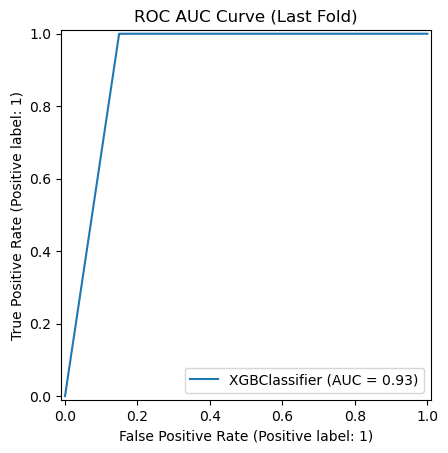

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC AUC Curve (Last Fold)")
plt.show()


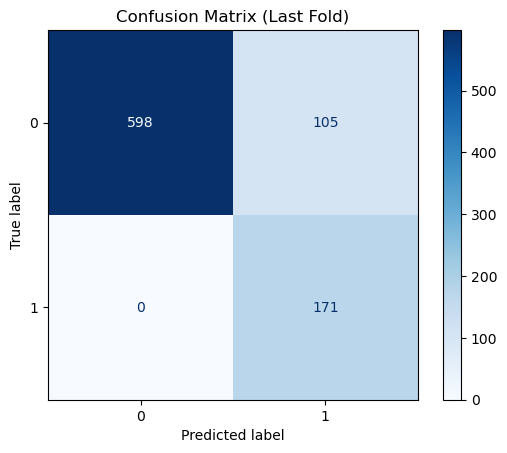

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix (Last Fold)")
plt.show()


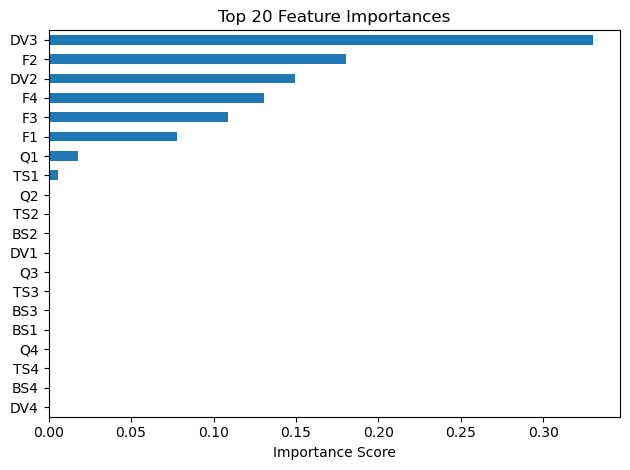

In [78]:
#Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
